# Fisher Discriminant Analysis

In questo laboratorio studieremo l'implementazione della Fisher Discriminant Analysis (FDA), in particolare nella sua forma generalizzata a più classi (Multiple Discriminant Analysis - MDA).

In [4]:
# ***** NOTA BENE! *****
# perché %matplotlib widget funzioni, installare nell'ambiente virtuale 
# il pacchetto ipympl con il comando:
# pip install ipympl
#
# ATTENZIONE: perché funzioni è necessario chiudere e rilanciare jupyter-lab
#
# STILE DI VISUALIZZAZIONE PLOT FATTI CON MATPLOTLIB
#%matplotlib widget
#
#
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
from FisherDA_missingparts import MultipleFisherDiscriminantAnalysis as MDA

## Importazione Dataset Wine

Importiamo il dataset "wine" di scikit-learn come visto nei laboratori per la PCA.

In [5]:
wine_dataset = datasets.load_wine(as_frame=True)

wine = pd.concat([wine_dataset['data'], wine_dataset['target']], axis=1)

display(wine)
print(wine_dataset['DESCR'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## MDA e PCA a Confronto.

Effettuiamo una riduzione di dimensionalità del dataset sia rispetto la MDA che la PCA. Visualizziamo poi i risultati per notare le differenze.

**Attenzione:** Ricorda che il dataset wine è caratterizzato da c = 3 classi e che la MDA può quindi proiettare i dati su uno spazio di al più (c-1) dimensioni.

**Esercizio 1:** Studia la classe MultipleFisherDiscriminantAnalysis nel modulo FisherDA.py e completa il codice del metodo "transform".

**Esercizio 2:** Completa il codice nelle celle seguenti.

In [7]:
# Inizializzazione degli oggetti MultipleFisherDiscriminantAnalysis
mda_2dim = MDA(2)  # Per la proiezione su 2 dimensioni
mda_1dim = MDA(1)  # Per la proiezione su una dimensione

# Inizializzazione degli oggetti PrincipalComponentAnalysis
pca_2dim = PCA(2)  # Per la proiezione su 2 dimensioni
pca_1dim = PCA(1)  # Per la proiezione su una dimensione

In [8]:
# Preparazione dataset per i metodi "fit" di mda_1dim, mda_2dim, pca_1dim, pca_2dim.
X = wine_dataset['data'].values
y = wine_dataset['target'].values

# "Fit" degli oggetti sopra inizializzati
# ATTENZIONE! usare StandardScaler per PCA!
mda_2dim.fit(X, y)
mda_1dim.fit(X, y)

scaler = StandardScaler()
scaler.fit(X)
Xscaled = scaler.transform(X)

pca_1dim.fit(Xscaled)
pca_2dim.fit(Xscaled)

PCA(n_components=2)

In [9]:
# Trasformazione del dataset X rispetto alle proiezioni eseguite da mda_1dim, mda_2dim, pca_1dim, pca_2dim.
# ATTENZIONE! usare StandardScaler per PCA!

Z2m = mda_2dim.transform(X)  # Trasformazione rispetto mda_2dim
Z1m = mda_1dim.transform(X)  # Trasformazione rispetto mda_1dim
Z2p = pca_2dim.transform(Xscaled)  # Trasformazione rispetto pca_2dim
Z1p = pca_1dim.transform(Xscaled)  # Trasformazione rispetto pca_1dim

Text(0.5, 1.0, 'PCA')

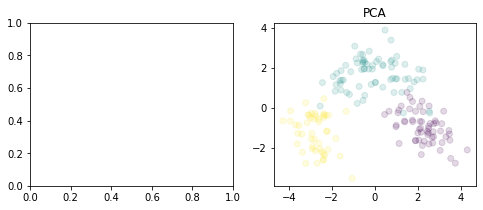

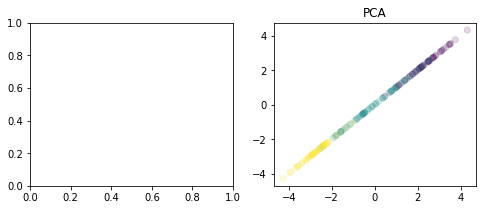

In [11]:
# Plot a confronto

# Plot per proiezione in R^2
fig2, axs2 = plt.subplots(1, 2, figsize=(8, 3))
#axs2[0].scatter(Z2m[:, 0], Z2m[:, 1], c=y, alpha=0.15)
#axs2[0].set_title('MDA')
axs2[1].scatter(Z2p[:, 0], Z2p[:, 1], c=y, alpha=0.15)
axs2[1].set_title('PCA')

# Plot per proiezione in R^1
fig1, axs1 = plt.subplots(1, 2, figsize=(8, 3))
#axs1[0].scatter(Z1m, Z1m, c=y, alpha=0.15)
#axs1[0].set_title('MDA')
axs1[1].scatter(Z1p, Z1p, c=y, alpha=0.15)
axs1[1].set_title('PCA')